In [1]:
import numpy as np
import pandas as pd
import ghibtools as gh
import matplotlib.pyplot as plt
from params import *
from configuration import *
from compute_rsa import rsa_phase_job
from compute_global_dataframes import rsa_concat_job
from bibliotheque import df_baseline
import seaborn as sns

In [2]:
savefolder = base_folder / 'Figures' / 'RSA'

In [3]:
rows_df = []

ncols = len(session_keys)

for sub in subject_keys:
    print(sub)
    
    fig, axs = plt.subplots(ncols = ncols, figsize = (13,5), constrained_layout = True)
    fig.suptitle(f'Heart rate according to respiration phase in {sub}', y = 1.05, fontsize = 20)
    
    for c, session in enumerate(session_keys):
        run_key = f'{sub}_{session}'
        rsa = rsa_phase_job.get(run_key)['rsa']
        phase = rsa.coords['phase'].values
        
        ax = axs[c]

        N = rsa.coords['cycle'].size

        mean_rsa = rsa.mean('cycle')
        rsa_delta =float(np.max(mean_rsa) - np.min(mean_rsa))
        rows_df.append([sub, session, rsa_delta])

        for cycle in rsa.coords['cycle'].values:
            ax.plot(phase, rsa.loc[cycle,:].values, color = 'k', lw = 0.4, alpha = 0.4)
        ax.plot(phase, mean_rsa.values, color = 'orange', lw = 5)
        ax.set_title(f'{session} - N : {N} - RSA : {round(rsa_delta, 2)} bpm') 
        ax.axvline(0.4, color = 'r')
        ax.set_ylim(30, 120)
        ax.set_ylabel('Heart Beat [bpm]')
        ax.set_xlabel('Respiratory phase')

    fig.savefig(savefolder / 'by_subject' / f'{sub}.png', bbox_inches = 'tight')
    plt.close()
        

P01
rsa_phase is processing ('P01_music',)
rsa_phase is processing ('P01_odor',)
P02
rsa_phase is processing ('P02_baseline',)
rsa_phase is processing ('P02_music',)
rsa_phase is processing ('P02_odor',)
P03
rsa_phase is processing ('P03_baseline',)
rsa_phase is processing ('P03_music',)
rsa_phase is processing ('P03_odor',)
P04
rsa_phase is processing ('P04_baseline',)
rsa_phase is processing ('P04_music',)
rsa_phase is processing ('P04_odor',)
P05
rsa_phase is processing ('P05_baseline',)
rsa_phase is processing ('P05_music',)
rsa_phase is processing ('P05_odor',)
P06
rsa_phase is processing ('P06_baseline',)
rsa_phase is processing ('P06_music',)
rsa_phase is processing ('P06_odor',)
P07
rsa_phase is processing ('P07_baseline',)
rsa_phase is processing ('P07_music',)
rsa_phase is processing ('P07_odor',)
P08
rsa_phase is processing ('P08_baseline',)
rsa_phase is processing ('P08_music',)
rsa_phase is processing ('P08_odor',)
P09
rsa_phase is processing ('P09_baseline',)
rsa_phase is

In [3]:
df_rsa = rsa_concat_job.get(global_key).to_dataframe()
# df_rsa.to_excel(base_folder / 'Tables' / 'rsa.xlsx')

In [4]:
df_rsa = df_rsa[df_rsa['participant'] != 'P02']

In [5]:
df_rsa.columns

Index(['peak_index', 'trough_index', 'peak_time', 'trough_time', 'peak_value',
       'trough_value', 'rising_amplitude', 'decay_amplitude',
       'rising_duration', 'decay_duration', 'rising_slope', 'decay_slope',
       'participant', 'session', 'stai_state', 'stai_trait', 'Gender',
       'Maia_Mean', 'OAS', 'BMRQ'],
      dtype='object')

In [6]:
indexes = ['participant','session']
metrics =  ['peak_value',
       'trough_value', 'rising_amplitude', 'decay_amplitude',
       'rising_duration', 'decay_duration', 'rising_slope', 'decay_slope']
metrics_with_psycho = ['peak_value',
       'trough_value', 'rising_amplitude', 'decay_amplitude',
       'rising_duration', 'decay_duration', 'rising_slope', 'decay_slope', 'stai_state', 'stai_trait', 'Maia_Mean']

In [7]:
df_rsa = df_rsa.groupby(indexes).median(True).reset_index()
df_rsa

,participant,session,peak_index,trough_index,peak_time,trough_time,peak_value,trough_value,rising_amplitude,decay_amplitude,rising_duration,decay_duration,rising_slope,decay_slope,stai_state,stai_trait,Maia_Mean,OAS,BMRQ
0,P01,baseline,2993.0,3007.0,299.3130,300.7130,86.714163,82.792616,3.768560,3.829268,1.1345,1.50,2.929955,2.597615,40.0,61.0,1.019643,2.666667,2.727273
1,P01,music,3016.5,3030.5,301.7140,303.1140,83.910902,80.030339,3.572436,3.586949,1.3610,1.50,2.538447,2.514716,40.0,61.0,1.019643,2.666667,2.727273
2,P01,odor,2995.5,3013.0,299.5840,301.3340,81.541600,77.209442,3.904454,3.532254,1.4110,1.45,2.749728,2.601323,40.0,61.0,1.019643,2.666667,2.727273
3,P03,baseline,3064.0,3086.0,306.4470,308.6470,88.558590,75.187970,13.067606,13.369991,1.6540,2.20,7.219826,5.501861,20.0,24.0,3.664583,3.266667,3.136364
4,P03,music,3345.0,3364.0,334.5860,336.4860,85.806562,74.936715,9.560027,9.429559,1.5865,2.10,5.825576,4.664901,20.0,24.0,3.664583,3.266667,3.136364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,P30,music,2966.0,2984.0,296.6990,298.4990,66.582222,63.588428,2.974849,2.829453,1.3165,1.80,2.042907,1.710240,25.0,29.0,3.071131,2.966667,3.045455
83,P30,odor,3507.0,3529.5,350.7435,352.9935,65.222211,61.507596,3.408852,3.419358,2.0840,2.00,1.585456,1.678314,25.0,29.0,3.071131,2.966667,3.045455
84,P31,baseline,3357.0,3379.0,335.7750,337.9750,77.091564,70.775628,5.841886,5.280174,2.4525,2.20,2.488835,2.696350,29.0,40.0,2.790774,2.933333,2.681818
85,P31,music,3153.0,3178.0,315.3110,317.8110,72.713747,65.096112,6.873399,6.261407,2.7830,2.50,2.422154,2.886400,29.0,40.0,2.790774,2.933333,2.681818


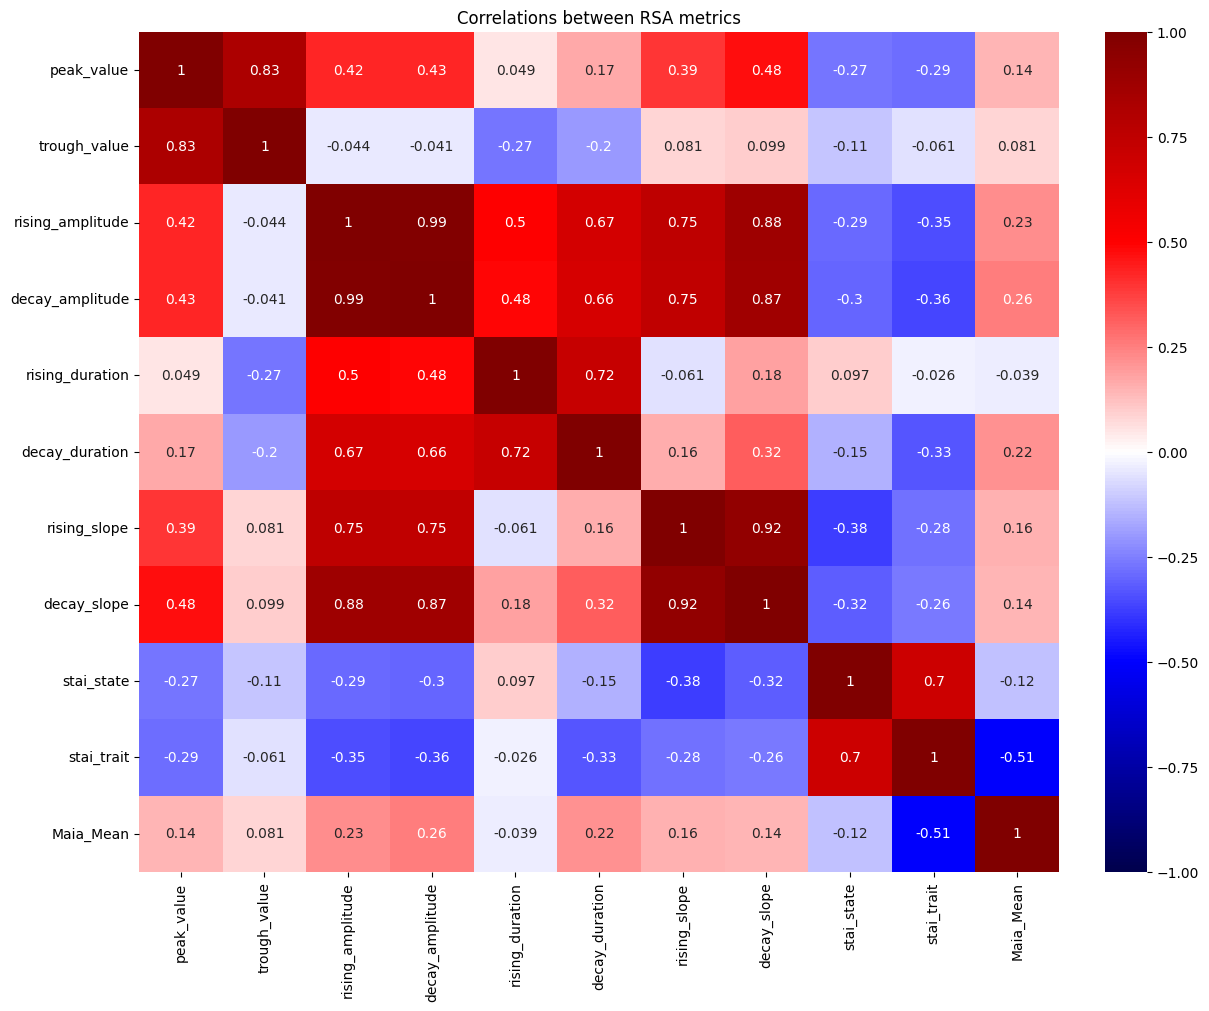

In [8]:
fig, ax = plt.subplots(figsize = (12,10), constrained_layout = True)
sns.heatmap(df_rsa[metrics_with_psycho].corr(method = 'spearman', numeric_only = True), annot = True, ax=ax, vmin = -1, vmax = 1, cmap = 'seismic')
ax.set_title('Correlations between RSA metrics')
fig.savefig(savefolder / 'Correlations.png')

In [9]:
df_rsa_baseline = df_baseline(df = df_rsa, indexes =  indexes, metrics = metrics)

In [10]:
clean_metrics = {'rising_amplitude':'Rising Amplitude', 
                 'decay_amplitude':'Decay Amplitude', 
                 'rising_duration':'Rising Duration',
                 'decay_duration':'Decay Duration', 
                 'rising_slope':'Rising Slope', 
                 'decay_slope':'Decay Slope', 
                 'peak_value':'Peak Value',
                 'trough_value':'Trough Value',
                }
units = {'rising_amplitude':'bpm', 
                 'decay_amplitude':'bpm', 
                 'rising_duration':'sec',
                 'decay_duration':'sec', 
                 'rising_slope':'bpm/sec', 
                 'decay_slope':'bpm/sec', 
                 'peak_value':'bpm',
                 'trough_value':'bpm'
        }

/home/valentin.ghibaudo/.virtualenvs/py3.10_nodegpu/lib/python3.10/site-packages/scipy/stats/_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


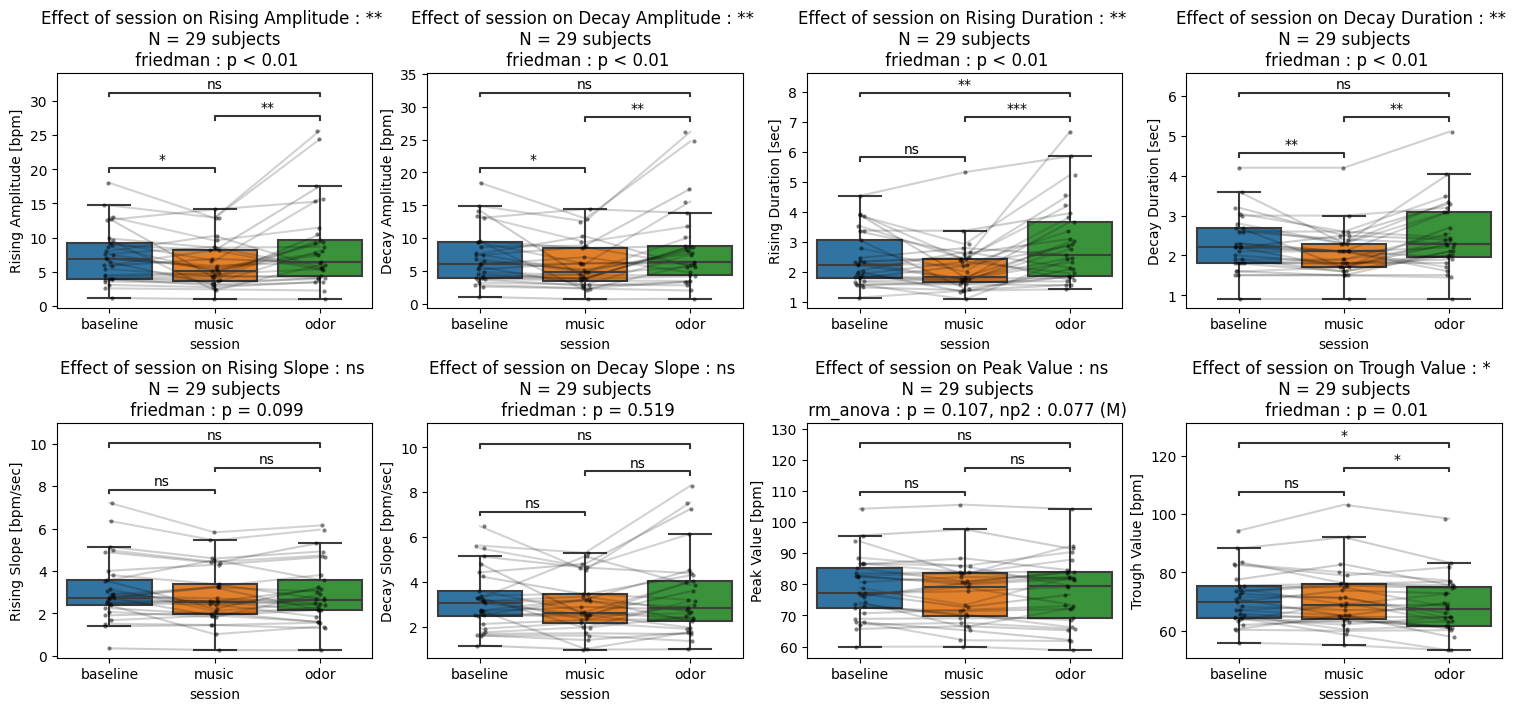

In [11]:
nrows = 2
ncols = 4

metrics_array = np.array(list(clean_metrics.keys())).reshape(nrows, ncols)

fig, axs = plt.subplots(nrows, ncols, figsize = (15,7), constrained_layout =  True)

for r in range(nrows):
    for c in range(ncols):
        ax = axs[r,c]
        metric = metrics_array[r,c]

        gh.auto_stats(df = df_rsa, 
                      predictor = 'session', 
                      outcome = metric, 
                      design = 'within', 
                      subject = 'participant', 
                      ax=ax, 
                      outcome_clean_label = clean_metrics[metric], 
                      outcome_unit = units[metric],
                     xtick_info = False)

    file = savefolder / 'raw_rsa.png'
fig.savefig(file, bbox_inches = 'tight')

In [12]:
df_rsa_baseline

,participant,session,peak_value,trough_value,rising_amplitude,decay_amplitude,rising_duration,decay_duration,rising_slope,decay_slope
0,P01,odor,0.940349,0.932564,1.036060,0.922436,1.243720,0.966667,0.938488,1.001427
1,P03,odor,0.898799,0.904540,0.876565,0.886247,1.099758,0.772727,0.851789,1.117661
2,P04,odor,1.041974,0.976727,2.448921,1.996444,1.546352,1.500000,1.389633,1.593820
3,P05,odor,0.971896,0.943840,1.076500,1.485567,1.368988,1.147541,0.782461,0.912284
4,P06,odor,0.909256,0.828118,2.285944,2.293431,1.938104,1.184211,1.406973,1.802180
5,P07,odor,1.041233,0.898976,1.745344,1.754496,1.810186,1.107143,0.934688,1.474481
6,P08,odor,1.060778,0.997584,1.355070,1.340246,1.348597,1.066667,0.949587,1.163459
7,P09,odor,0.909328,0.908976,0.814310,0.904114,1.615430,1.416667,0.602811,0.639364
8,P10,odor,0.980134,0.953294,1.253690,1.411410,1.487157,1.476190,0.956261,0.997475
9,P11,odor,0.983355,0.904875,1.693444,1.659194,1.890925,1.500000,0.805905,1.104311


/home/valentin.ghibaudo/.virtualenvs/py3.10_nodegpu/lib/python3.10/site-packages/scipy/stats/_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


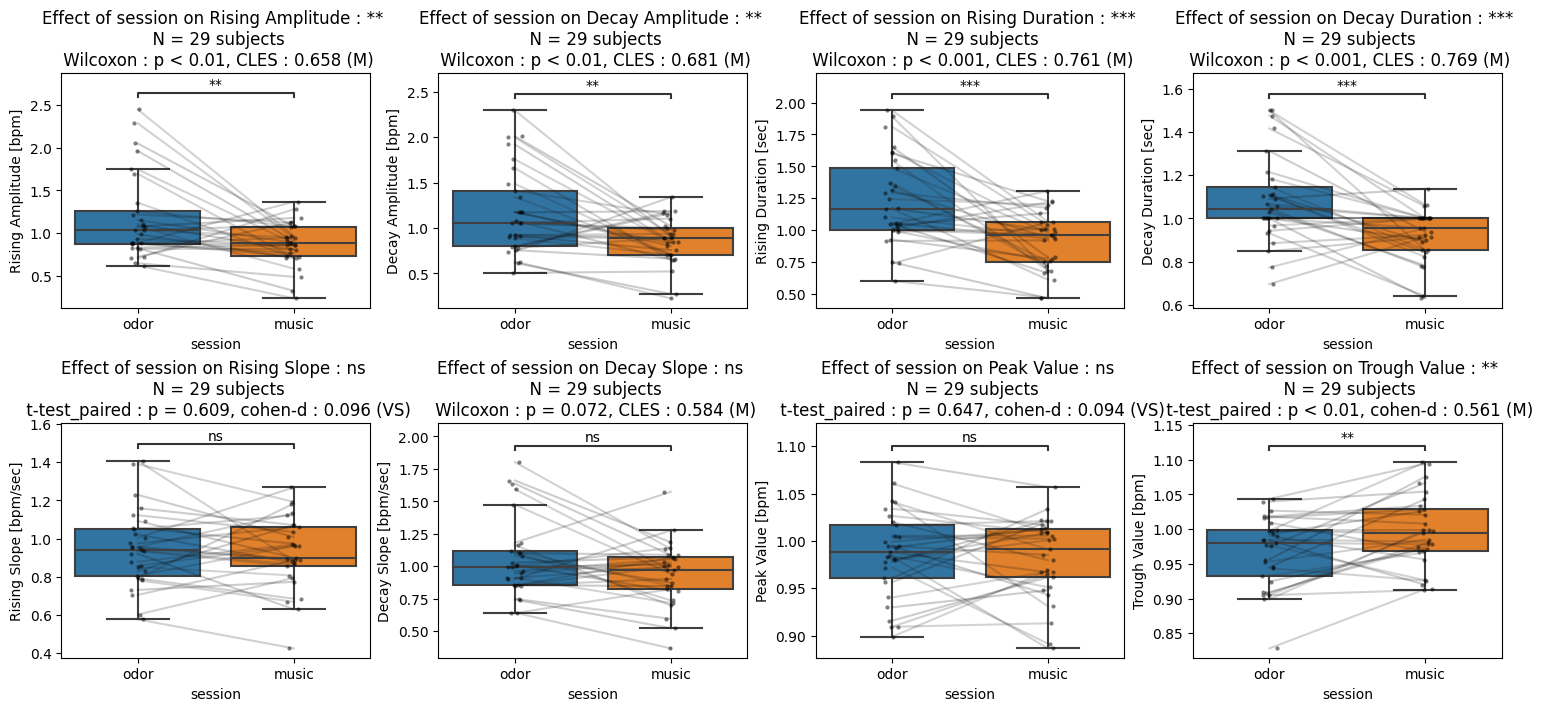

In [13]:
nrows = 2
ncols = 4

metrics_array = np.array(list(clean_metrics.keys())).reshape(nrows, ncols)

fig, axs = plt.subplots(nrows, ncols, figsize = (15,7), constrained_layout =  True)

for r in range(nrows):
    for c in range(ncols):
        ax = axs[r,c]
        metric = metrics_array[r,c]

        gh.auto_stats(df = df_rsa_baseline, 
                      predictor = 'session', 
                      outcome = metric, 
                      design = 'within', 
                      subject = 'participant', 
                      ax=ax, 
                      outcome_clean_label = clean_metrics[metric], 
                      outcome_unit = units[metric],
                     xtick_info = False)

file = savefolder / 'rsa_ratio_to_baseline.png'
fig.savefig(file, bbox_inches = 'tight')

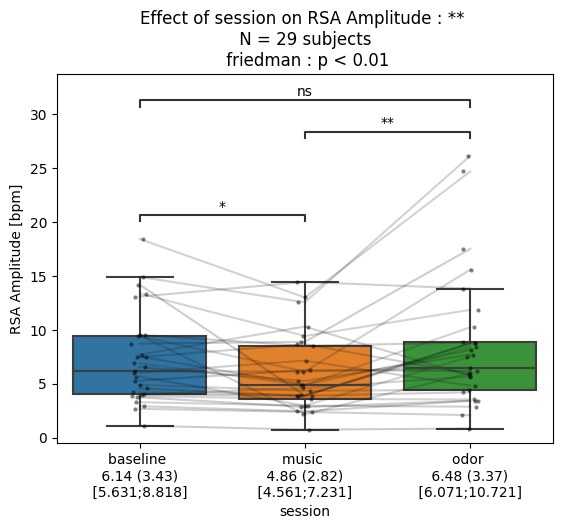

In [16]:
fig, ax = plt.subplots()

gh.auto_stats(df = df_rsa, 
              predictor = 'session', 
              outcome = 'decay_amplitude', 
              design = 'within', 
              subject = 'participant', 
              ax=ax, 
              outcome_clean_label = 'RSA Amplitude', 
              outcome_unit = 'bpm',
             xtick_info = True)

file = savefolder / 'raw_rsa_clean.png'
fig.savefig(file, bbox_inches = 'tight', dpi = 300)